In [1]:
# How long will I be on hold?
#   - Which age group checks out the most books? Which age groups has the highest renewal rate (# ttl renewals/# ttl checkouts)
#   - Which library branch gets the most checkouts?
#   - Can the library branch and the average number of checkouts be used to estimate the age group of the patron?

# SF Library Data Analysis 

In [2]:
#load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

## Load and Look

In [3]:
#load dataset downloaded from DataSF website and take a look 
df = pd.read_csv('Library_Usage.csv');
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [4]:
#423448 records to start
df.shape

(423448, 15)

In [5]:
df.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [6]:
#for numerical
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [7]:
# Can see from above that there are some missing values. How many and where are they?
df.isnull().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

## Assessment

When taking a brief look at the data, I noticed the following:

    1. Header names include spaces
    2. Some columns are codified versions of another column, making the information duplicative 
    3. There are a significant amount of missing values in the Supervisor District attribute, drop?
    4. Circulation Active Year is currently being read as an object type
    5. There are many categorical variables, not sure if all are needed

## Clean up

In [8]:
# I noticed the headers of all columns include spaces
# I want get rid of spaces and make all lower case for easier referencing
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,patron_type_code,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_code,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_code,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,supervisor_district
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [9]:
# There is repetative information in some columns:
# home_library_code and home_library_definition
# patron_type_code and patron_type_definition
# notice_preference_definition, notice_preference_definition
# I want to make the data as readable as possible, so I am going to keep the definitions and get rid of the codes.


df.drop(['home_library_code','notice_preference_code', 'patron_type_code'], axis =1,inplace = True)
df.head()


,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,supervisor_district
0,SENIOR,28,13,65 to 74 years,Main Library,November,2012,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,Main Library,October,2015,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,Main Library,January,2015,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,Mission Bay,February,2016,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,Main Library,July,2016,email,True,2003,False,NaN


In [10]:
# I also noticed that the data for Supervisor District is not in the file 
# and this column has a significant amount of missing data ( ~30%)
# so I am going to drop this column as well
df.drop(['supervisor_district'], axis =1,inplace = True)

In [14]:
df = df.astype({"circulation_active_year": int});

ValueError: invalid literal for int() with base 10: 'None'

In [24]:
# Interesting, looks like there is a 'None' value in the Active Year which prevents me from converting to integer
# This leads to my next observation, there are many categorical variables, should all be kept/can be kept? 
# Required =  high relevance to questions posed
# Feasibility = % missing values and confidence in replacement method
# First, I want to get to know more about the categoricals and what they can tell me.
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts().sort_values());

FRIENDS FOR LIFE           40
AT USER TEEN               44
AT USER WELCOME            45
AT USER JUVENILE           47
AT USER SENIOR             66
BOOKS BY MAIL              95
RETIRED STAFF             157
AT USER ADULT             349
VISITOR                   415
STAFF                     862
SPECIAL                   977
DIGITAL ACCESS CARD      1744
TEACHER CARD             1782
WELCOME                 14931
YOUNG ADULT             28816
SENIOR                  41619
JUVENILE                59208
ADULT                  272251
Name: patron_type_definition, dtype: int64
75 years and over    14150
60 to 64 years       19800
55 to 59 years       21230
20 to 24 years       29761
65 to 74 years       30141
0 to 9 years         38242
45 to 54 years       52492
10 to 19 years       58944
35 to 44 years       67390
25 to 34 years       91083
Name: age_range, dtype: int64
Branch Bookmobile (Marina)                 7
Branch Bookmobile (Excelsior)             23
Branch Bookmobile (Sunset) 

In [27]:
# Just looking at the categories, I want to keep all columns, but it does look like
# quite a few have 'None' or 'Unknown' categories, which I would considered as missing data
# I want to know just how much missing data is present in each column.
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print((df[i][df[i]== 'None']).count()/df.shape[0])


patron_type_definition
0.0
age_range
0.0
home_library_definition
0.0
circulation_active_month
0.16035971358938997
circulation_active_year
0.16035971358938997
notice_preference_definition
0.0


In [28]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print((df[i][df[i]== 'Unknown']).count()/df.shape[0])

patron_type_definition
0.0
age_range
0.0
home_library_definition
0.003537624454478472
circulation_active_month
0.0
circulation_active_year
0.0
notice_preference_definition
0.0


In [37]:
# looks like circulation active year and month have the highest percent missing at ~16%
# other columns missing value count are fairly minimal when compared to entire dataset. 
# I do not think I have enough information to impute these values, so I will choose to omit these
# records from my analysis
df_comp = df[df.circulation_active_year != 'None']
df_comp = df_comp[df_comp.home_library_definition != 'Unknown']
df_comp = df_comp[df_comp.notice_preference_definition != 'none']

In [38]:
print(df_comp.circulation_active_year[df_comp.circulation_active_year == 'None'].count()) #year
print(df_comp.circulation_active_month[df_comp.circulation_active_month == 'None'].count()) #month
print(df_comp.home_library_definition[df_comp.home_library_definition== 'Unknown'].count()) # library_def
print(df_comp.notice_preference_definition[df_comp.notice_preference_definition == 'none'].count())# notice

0
0
0
0


In [39]:
df_comp.shape

(354203, 11)

In [43]:
# Now all categorical variable with missing data have been cleaned up, but what about the int variable?
# From before I noticed missing data in the Age_Range column.
# Again, I do not feel that I have enough information in the dataset to accurately predict the age range, so I 
# going to drop these rows before analyzing and/or modeling
df_comp.dropna(subset = ['age_range'], axis = 0, inplace = True)
df_comp.isnull().sum()

patron_type_definition          0
total_checkouts                 0
total_renewals                  0
age_range                       0
home_library_definition         0
circulation_active_month        0
circulation_active_year         0
notice_preference_definition    0
provided_email_address          0
year_patron_registered          0
outside_of_county               0
dtype: int64

In [44]:
# that took me down about 130 records
df_comp.shape

(354077, 11)

In [45]:
#Now back to the original task, converting circulation_active_year to an int type
df_comp = df_comp.astype({"circulation_active_year": int});
df_comp.dtypes

patron_type_definition          object
total_checkouts                  int64
total_renewals                   int64
age_range                       object
home_library_definition         object
circulation_active_month        object
circulation_active_year          int64
notice_preference_definition    object
provided_email_address            bool
year_patron_registered           int64
outside_of_county                 bool
dtype: object

## Analyze

In [16]:
# How does the number of average total checkouts vary between age_range?
# How does the average total renewals to total checkouts ratio = renewal rate vary between age_range?
# Do supervisor districts have any effect on the above trends?
# Can I predict a users  approx. renewal rate base on age_range and home library, etc.?

#Additional Questions from a business standpoint:
#Which age group has the activity rate = ttl_checkouts/ttl_active_yrs (active yr - yr registered)



In [17]:
#Does the number of average total checkouts vary between age_range?
df.groupby('age_range').total_checkouts.mean().sort_values()
#Looks like 75 and over years has the most check outs average checkouts.
#Though if older patrons have been with the libraries longer, this would may be true just due to time.
#Therefore, average yearly might be a better number for comparison

age_range
25 to 34 years        63.330362
35 to 44 years       132.140065
20 to 24 years       135.212104
0 to 9 years         153.723500
45 to 54 years       227.055236
10 to 19 years       269.106897
55 to 59 years       289.105999
60 to 64 years       324.317297
65 to 74 years       351.632331
75 years and over    369.113091
Name: total_checkouts, dtype: float64

In [18]:
df['years_active'] = df.circulation_active_year - df.year_patron_registered
df.head()

,patron_type_code,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,supervisor_district,years_active
0,3,SENIOR,28,13,65 to 74 years,Main Library,November,2012,email,True,2003,True,NaN,9
1,0,ADULT,21,10,55 to 59 years,Main Library,October,2015,email,True,2003,False,NaN,12
2,0,ADULT,275,559,60 to 64 years,Main Library,January,2015,email,True,2003,True,NaN,12
3,0,ADULT,73,38,45 to 54 years,Mission Bay,February,2016,email,True,2003,False,NaN,13
4,0,ADULT,182,90,45 to 54 years,Main Library,July,2016,email,True,2003,False,NaN,13


In [19]:
#make assumption that if person was last active in the same year they registered, automatically 1 year active
df.years_active = np.where(df.years_active == 0, 1, df.years_active)

In [20]:
df['yearly_checkouts'] = df.total_checkouts/df.years_active


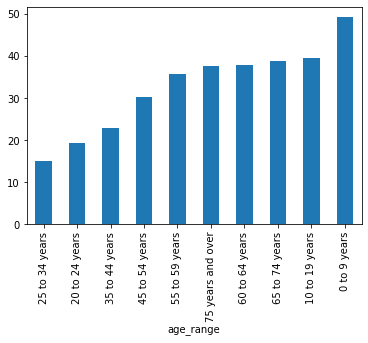

In [21]:
df.groupby('age_range').yearly_checkouts.mean().sort_values().plot(kind ='bar');

In [22]:
#Add another column for renewal rate, the approx. times per checkout that someone has renewed their checkout
df['renewal_rate'] = df.total_renewals/df.total_checkouts
df.describe()

,patron_type_code,total_checkouts,total_renewals,circulation_active_year,year_patron_registered,supervisor_district,years_active,yearly_checkouts,renewal_rate
count,355544.000000,355544.000000,355544.000000,355544.000000,355544.000000,275257.000000,355544.000000,355544.000000,349852.000000
mean,0.964533,192.918249,71.051029,2014.724943,2009.646629,6.285896,5.261236,29.918769,0.423422
std,4.103236,489.073558,243.904662,1.567938,4.348615,3.133139,4.255645,60.458448,0.636155
min,0.000000,0.000000,0.000000,2003.000000,2003.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,2014.000000,2006.000000,4.000000,1.000000,3.000000,0.000000
50%,0.000000,34.000000,6.000000,2015.000000,2011.000000,7.000000,4.000000,9.416667,0.156098
75%,1.000000,155.000000,39.000000,2016.000000,2013.000000,9.000000,9.000000,30.000000,0.593985
max,104.000000,35907.000000,8965.000000,2016.000000,2016.000000,11.000000,13.000000,3736.000000,9.000000


In [23]:
#Are any nulls added with the new column?
df.renewal_rate.isnull().sum()


5692

In [24]:
#I assume that the above happens with a person has no checkouts
#and therefore has nothing to renew, resulting in a divided by zero situation
# Now to decide how I want to subsitute this information.
#I want my analysis to only involve "Active" users, which I will define as having at
#least one checkout. Therefore, I will choose to drop all columns that have a renewal rate of null
df = df.dropna(subset = ["renewal_rate"], axis = 0)
df.shape

(349852, 16)

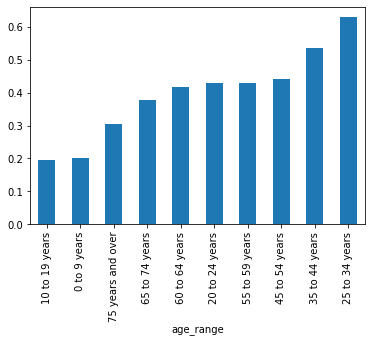

In [25]:
#Which age group has the largest renewal rate?
df.groupby('age_range').renewal_rate.mean().sort_values().plot(kind = 'bar');

#It's interesting: 25 to 34 years has the largest renewal to checkout ratio

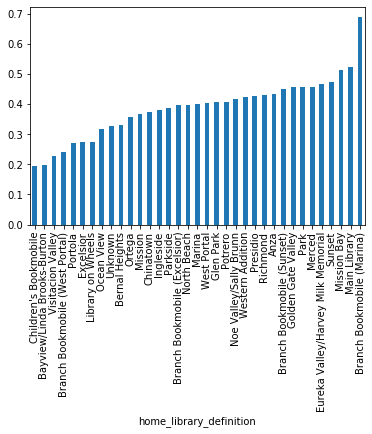

In [26]:
# ok so now I know approximately how long I would have to wait for an item if I knew what age group the person was in,
# but does it matter what the home library is?
df.groupby('home_library_definition').renewal_rate.mean().sort_values().plot(kind = 'bar');

In [27]:
df.groupby(['home_library_definition','age_range']).renewal_rate.mean().sort_values()

home_library_definition          age_range        
Library on Wheels                10 to 19 years       0.000000
Branch Bookmobile (West Portal)  60 to 64 years       0.000000
Branch Bookmobile (Excelsior)    0 to 9 years         0.038911
                                 75 years and over    0.058577
Branch Bookmobile (Marina)       75 years and over    0.083521
                                                        ...   
Branch Bookmobile (Excelsior)    25 to 34 years       0.730472
                                 35 to 44 years       1.006500
Branch Bookmobile (Sunset)       20 to 24 years       1.268874
                                 55 to 59 years       1.398467
Branch Bookmobile (Marina)       25 to 34 years       1.945055
Name: renewal_rate, Length: 343, dtype: float64

In [28]:
#lets take a look at patron type
df.groupby('patron_type_definition').renewal_rate.mean().sort_values()


patron_type_definition
JUVENILE               0.183188
YOUNG ADULT            0.198338
DIGITAL ACCESS CARD    0.198807
AT USER JUVENILE       0.238094
TEACHER CARD           0.247743
VISITOR                0.266020
WELCOME                0.285859
SPECIAL                0.287446
AT USER WELCOME        0.310541
AT USER TEEN           0.349852
SENIOR                 0.351926
BOOKS BY MAIL          0.398103
AT USER ADULT          0.421769
RETIRED STAFF          0.482747
ADULT                  0.522067
AT USER SENIOR         0.614742
FRIENDS FOR LIFE       0.616279
STAFF                  0.684836
Name: renewal_rate, dtype: float64

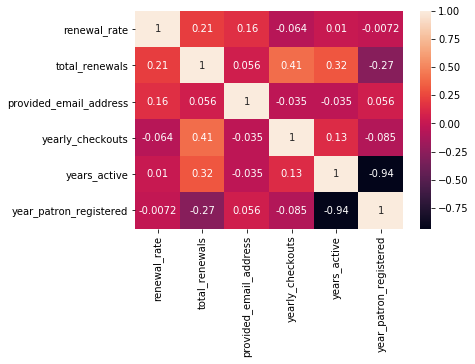

In [67]:
sns.heatmap(df[['renewal_rate', 'total_renewals', 'provided_email_address', 'yearly_checkouts', 'years_active', 'year_patron_registered']].corr(), annot = True);

In [30]:
df.dropna(subset = ['age_range'], axis = 0, inplace = True)

In [31]:
df.dropna(subset =['home_library_definition'], axis = 0, inplace = True)

In [32]:
df.head()

,patron_type_code,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,supervisor_district,years_active,yearly_checkouts,renewal_rate
0,3,SENIOR,28,13,65 to 74 years,Main Library,November,2012,email,True,2003,True,NaN,9,3.111111,0.464286
1,0,ADULT,21,10,55 to 59 years,Main Library,October,2015,email,True,2003,False,NaN,12,1.750000,0.476190
2,0,ADULT,275,559,60 to 64 years,Main Library,January,2015,email,True,2003,True,NaN,12,22.916667,2.032727
3,0,ADULT,73,38,45 to 54 years,Mission Bay,February,2016,email,True,2003,False,NaN,13,5.615385,0.520548
4,0,ADULT,182,90,45 to 54 years,Main Library,July,2016,email,True,2003,False,NaN,13,14.000000,0.494505


## Model

In [33]:
df.drop(['supervisor_district', ], axis =1,inplace = True)

In [37]:
df = df.round({'renewal_rate': 2, 'yearly_checkouts': 2})

In [39]:

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    df = pd.get_dummies(df, columns = cat_cols, dummy_na = dummy_na, drop_first= True)

    return df

In [40]:
def clean_fit_linear_mod(df,response_col, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
   # df_drop = df.dropna(subset = [response_col], axis = 0)
   # df_drop_na = df_drop.loc[:,((df_drop.isna().sum()/df_drop.shape[0]) == 1)== False]
    cat_df = df.select_dtypes(include = ['object'])
    cat_cols = cat_df.columns

    df_dummy = create_dummy_df(df, cat_cols, dummy_na = dummy_na)

    #fill_mean = lambda col: col.fillna(col.mean())

    #df_dummy_fill = df_dummy.apply(fill_mean, axis = 0)

    X = df_dummy.drop(response_col, axis = 1)
    y = df_dummy[response_col]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size, random_state = rand_state)

    lm_model = LinearRegression(normalize = True)
    lm_model.fit(X_train,y_train)
    y_preds = lm_model.predict(X_test)
    test_score = r2_score(y_test, y_preds)
    y_preds_train = lm_model.predict(X_train)
    train_score = r2_score(y_train, y_preds_train)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [58]:
df_model1 = df[['year_patron_registered','years_active','home_library_definition','patron_type_definition','age_range','yearly_checkouts','renewal_rate']]

In [59]:
test_score_1, train_score_1, lm_model_1, X_train_1, X_test_1, y_train_1, y_test_1 = clean_fit_linear_mod(df_model1,'renewal_rate', dummy_na=False, test_size=.3, rand_state=42);

In [60]:
test_score_1,train_score_1

(0.07536632823497402, 0.07508039668005317)

In [88]:
df_model2 = df[['provided_email_address','age_range','renewal_rate']]

In [89]:
test_score_2, train_score_2, lm_model_2, X_train_2, X_test_2, y_train_2, y_test_2 = clean_fit_linear_mod(df_model2,'renewal_rate', dummy_na=False, test_size=.3, rand_state=42);

In [90]:
test_score_2,train_score_2

(0.07251910364926617, 0.07059466175606255)

In [56]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           renewal_rate   R-squared (uncentered):                   0.358
Model:                            OLS   Adj. R-squared (uncentered):              0.358
Method:                 Least Squares   F-statistic:                              2164.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):                        0.00
Time:                        10:47:40   Log-Likelihood:                     -2.2703e+05
No. Observations:              244808   AIC:                                  4.542e+05
Df Residuals:                  244745   BIC:                                  4.548e+05
Df Model:                          63                                                  
Covariance Type:            nonrobust                                                  
                                                                 coef    std err          t      P>|t|      [0.025      

In [57]:
X_train.head()

,year_patron_registered,years_active,yearly_checkouts,home_library_definition_Bayview/Linda Brooks-Burton,home_library_definition_Bernal Heights,home_library_definition_Branch Bookmobile (Excelsior),home_library_definition_Branch Bookmobile (Marina),home_library_definition_Branch Bookmobile (Sunset),home_library_definition_Branch Bookmobile (West Portal),home_library_definition_Children's Bookmobile,...,patron_type_definition_YOUNG ADULT,age_range_10 to 19 years,age_range_20 to 24 years,age_range_25 to 34 years,age_range_35 to 44 years,age_range_45 to 54 years,age_range_55 to 59 years,age_range_60 to 64 years,age_range_65 to 74 years,age_range_75 years and over
236631,2005,9,11.33,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40455,2005,9,0.78,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11603,2010,3,4.67,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213998,2006,10,45.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62826,2003,13,31.46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
